In [11]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from matplotlib.colors import ListedColormap


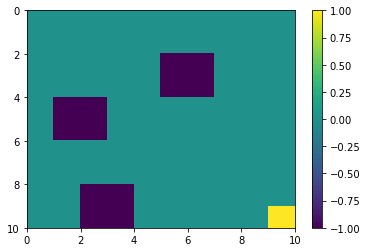

In [2]:
# reward function 1
matrix = np.zeros((10,10))
matrix[2][5] = -1.0
matrix[2][6] = -1.0
matrix[3][5] = -1.0
matrix[3][6] = -1.0
matrix[4][1] = -1.0
matrix[4][2] = -1.0
matrix[5][1] = -1.0
matrix[5][2] = -1.0
matrix[8][2] = -1.0
matrix[8][3] = -1.0
matrix[9][2] = -1.0
matrix[9][3] = -1.0
matrix[9][9] = 1.0
# plot the heat map
plt.pcolor(matrix, vmin=np.min(matrix), vmax=np.max(matrix))
plt.ylim(top=0, bottom=10)
plt.xlim(left=0, right=10)
plt.colorbar()

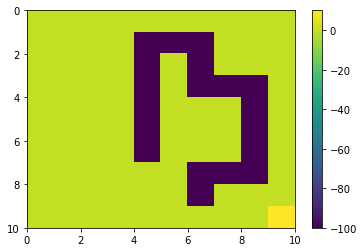

In [3]:
# reward function 2
matrix2 = np.zeros((10,10))
matrix2[1][4] = -100.0
matrix2[1][5] = -100.0
matrix2[1][6] = -100.0
matrix2[2][4] = -100.0
matrix2[2][6] = -100.0
matrix2[3][4] = -100.0
matrix2[3][6] = -100.0
matrix2[3][7] = -100.0
matrix2[3][8] = -100.0
matrix2[4][4] = -100.0
matrix2[4][8] = -100.0
matrix2[5][4] = -100.0
matrix2[5][8] = -100.0
matrix2[6][4] = -100.0
matrix2[6][8] = -100.0
matrix2[7][6] = -100.0
matrix2[7][7] = -100.0
matrix2[7][8] = -100.0
matrix2[8][6] = -100.0
matrix2[9][9] = 10.0
# plot the heat map
plt.pcolor(matrix2, vmin=np.min(matrix2), vmax=np.max(matrix2))
plt.ylim(top=0, bottom=10)
plt.xlim(left=0, right=10)
plt.colorbar()

In [4]:
# set up functions
# probability function
def prob(curr_state, next_state, move, proba):
    #check if it's a neighbor
    left = curr_state -10
    up = curr_state-1
    right = curr_state+10
    down = curr_state+1
    # not a neighbor
    if(next_state==left):
        if(move == -10):
            return (1-proba+proba/4)
        else:
            return(proba/4)
    elif(next_state==up):
        if(move == -1):
            return (1-proba+proba/4)
        else:
            return(proba/4)
    elif(next_state==right):
        if(move == 10):
            return (1-proba+proba/4)
        else:
            return(proba/4)
    elif(next_state==down):
        if(move == 1):
            return (1-proba+proba/4)
        else:
            return(proba/4)
    elif(next_state==curr_state):
        record = 0
        if left < 0:
            if move == -10:
                record += (1-proba+proba/4)
            else:
                record = proba/4
        if right > 99:
            if move == 10:
                record += (1-proba+proba/4)
            else:
                record = proba/4
        if up % 10 == 9:
            if move == -1:
                record += (1-proba+proba/4)
            else:
                record += proba/4
        if down % 10 == 0:
            if move == 1:
                record += (1-proba+proba/4)
            else:
                record += proba/4
        return record
    else:
        return 0            
###################################################################
# optimal value function 
def opt_val(probabililty, reward, states, gamma, r):
    # initialization
    for sx in range(10):
        for sy in range(10):
            states[sx, sy]=0
    # extimation
    delta = float('inf')
    while(delta > gamma):
        delta = 0
        store = states[:,:]
        for si in range(100):
            si_ten, si_dig=divmod(si, 10)
            v = states[si_dig, si_ten];
            temp=np.zeros(4);
            actions = [-10, -1, 10, 1]
            for ai in range(4):
                sum = 0;
                near = [si-10, si-1, si+10, si+1, si]
                for sn in near:
                    if(sn<0 or sn>=100 or (si%10==9 and sn%10==0) or (si%10==0 and sn%10==9)):
                        sum=sum
                    else:
                        i_ten, i_dig = divmod(sn, 10)
                        sum +=prob(si, sn, actions[ai], w)*(reward[i_dig, i_ten] + r * store[i_dig, i_ten])
                temp[ai] += sum
            states[si_dig, si_ten]=np.max(temp)
            delta = max(delta, abs(v-states[si_dig, si_ten]))
    return states

#####################################################################
# optimal direction function 
def value_iteration(w, reward, states, gamma, r):
    # initialization
    for sx in range(10):
        for sy in range(10):
            states[sx, sy]=0
    # extimation
    delta = float('inf')
    while(delta > gamma):
        delta = 0
        store = states[:,:]
        direction = np.zeros((10,10))
        act = [0, 1, 2, 3]
        for si in range(100):
            si_ten, si_dig=divmod(si, 10)
            v = states[si_dig, si_ten];
            temp=np.zeros(4);
            actions = [-10, -1, 10, 1]
            for ai in range(4):
                sum = 0;
                near = [si-10, si-1, si+10, si+1, si]
                for sn in near:
                    if(sn<0 or sn>=100 or (si%10==9 and sn%10==0) or (si%10==0 and sn%10==9)):
                        sum=sum
                    else:
                        i_ten, i_dig = divmod(sn, 10)
                        sum +=prob(si, sn, actions[ai], w)*(reward[i_dig, i_ten] + r * store[i_dig, i_ten])
                temp[ai] += sum
            states[si_dig, si_ten]=np.max(temp)
            delta = max(delta, abs(v-states[si_dig, si_ten]))
            # actions
            direction[si_dig, si_ten]=act[np.argmax(temp)]
    return states,direction
###########################################################################
def next_state(curr_dig, curr_ten, a):
    if(a==0):
        next_ten=max(curr_ten-1, 0)
        next_dig=curr_dig
    elif(a==1):
        next_ten=curr_ten
        next_dig=max(curr_dig-1,0)
    elif(a==2):
        next_ten=min(curr_ten+1, 9)
        next_dig=curr_dig
    elif(a==3):
        next_ten=curr_ten
        next_dig=min(curr_dig+1,9)
    next = next_ten*10 + next_dig                
    return next
        
def trans(optt, p):
    pa=np.zeros((100,100))
    for curr in range(100):
        curr_ten, curr_dig=divmod(curr, 10)
        opt_dir = optt[curr_dig, curr_ten]
        for ai in range(4):
                next = next_state(curr_dig, curr_ten, ai)
                prob=p/4
                if(ai==opt_dir):
                    prob+=1-p
                pa[curr][next]=prob
    return pa
    
def D_b(dd1, nr, w):
    # d
    I=np.identity(100)
    # generate transition matrix
    pa1=trans(dd1, w)
    pa2=trans(np.mod(dd1+1,4), w)
    pa3=trans(np.mod(dd1+2,4), w)
    pa4=trans(np.mod(dd1+3,4), w)
    # generate D
    zeroN=np.zeros((100,100))
    row1 = np.concatenate((I, zeroN, np.dot((pa2-pa1), np.linalg.inv(I-nr*pa1))), axis=1)
    row2 = np.concatenate((I, zeroN, np.dot((pa3-pa1), np.linalg.inv(I-nr*pa1))), axis=1)
    row3 = np.concatenate((I, zeroN, np.dot((pa4-pa1), np.linalg.inv(I-nr*pa1))), axis=1)
    row4 = np.concatenate((zeroN, zeroN, np.dot((pa2-pa1), np.linalg.inv(I-nr*pa1))), axis=1)
    row5 = np.concatenate((zeroN, zeroN, np.dot((pa3-pa1), np.linalg.inv(I-nr*pa1))), axis=1)
    row6 = np.concatenate((zeroN, zeroN, np.dot((pa4-pa1), np.linalg.inv(I-nr*pa1))), axis=1)
    row7 = np.concatenate((zeroN, -I, I), axis=1)
    row8 = np.concatenate((zeroN, -I, -I), axis=1)
    row9 = np.concatenate((zeroN, zeroN, I), axis=1)
    row10 = np.concatenate((zeroN, zeroN, -I), axis=1)
    D=np.concatenate((row1, row2, row3, row4, row5, row6, row7, row8, row9, row10), axis=0)
    #G= matrix(D)
    # generate b
    zero1=np.zeros((2*100,1))
    r_max = np.ones((100,1))
    b = np.concatenate((zero1, zero1, zero1, zero1, r_max, r_max),axis=0)
    return D,b
############################################################################
# optimal direction function 
def value_iteration_arrow(w, reward, states, gamma, r):
    # initialization
    for sx in range(10):
        for sy in range(10):
            states[sx, sy]=0
    # extimation
    delta = float('inf')
    while(delta > gamma):
        delta = 0
        store = states[:,:]
        direction = np.chararray((10,10),unicode=True)
        act = ['\u2190', '\u2191', '\u2192', '\u2193']
        for si in range(100):
            si_ten, si_dig=divmod(si, 10)
            v = states[si_dig, si_ten];
            temp=np.zeros(4);
            actions = [-10, -1, 10, 1]
            for ai in range(4):
                sum = 0;
                near = [si-10, si-1, si+10, si+1, si]
                for sn in near:
                    if(sn<0 or sn>=100 or (si%10==9 and sn%10==0) or (si%10==0 and sn%10==9)):
                        sum=sum
                    else:
                        i_ten, i_dig = divmod(sn, 10)
                        sum +=prob(si, sn, actions[ai], w)*(reward[i_dig, i_ten] + r * store[i_dig, i_ten])
                temp[ai] += sum
            states[si_dig, si_ten]=np.max(temp)
            delta = max(delta, abs(v-states[si_dig, si_ten]))
            # actions
            direction[si_dig, si_ten]=act[np.argmax(temp)]
    return states,direction

In [8]:
# creating the environment
states = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        states[i][j] += 10*j + i
        
gamma = 0.01
w = 0.1
nr = 0.8

direction2 = np.chararray((10,10), unicode=True)
r = 0.8
w = 0.1

s2, direction2=value_iteration_arrow(w, matrix2, states,gamma, r)
    
print(direction2)

[['↓' '↓' '↓' '←' '←' '→' '→' '→' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↑' '→' '→' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↓' '→' '→' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↓' '↓' '↑' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↓' '↓' '↓' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↓' '↓' '←' '→' '↓']
 ['↓' '↓' '↓' '↓' '↓' '↓' '←' '←' '→' '↓']
 ['↓' '↓' '↓' '↓' '↓' '↓' '←' '↓' '↓' '↓']
 ['→' '→' '→' '↓' '↓' '↓' '↓' '↓' '↓' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→']]


In [12]:
nr=0.8
nnw=0.1

nstates6 = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        nstates6[i][j] += 10*j + i
gamma = 0.0001
nnw = 0.1
s5, d5= value_iteration(nnw, matrix2, nstates6, gamma, nr)

D2, b2 = D_b(d5,0.8, 0.1)
lambs =np.linspace(0,5,500)
acc2=np.zeros(500)
for i, lamb in enumerate(np.linspace(0,5,500)):
    # form c
    c2 = np.concatenate((np.ones((100,)), -lamb*np.ones((100,)), np.zeros((100,))))
    # solve
    #ct=np.transpose(c)
    res2 = linprog(c2,A_ub=D2,b_ub=b2, A_eq=None, b_eq=None, bounds=None)
    opt_x2=np.array(res2['x'])
    R2=np.reshape(opt_x2[200:], (10,10)).T
    s7, d7= value_iteration_arrow(nnw, R2, nstates6, gamma, 0.8)
    accuracy2=np.sum(d7==direction2)/100
    acc2[i]=accuracy2


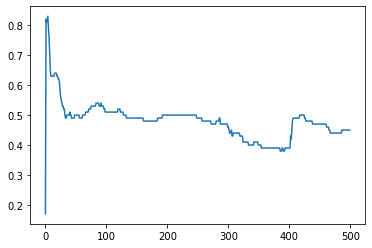

In [13]:
plt.plot(acc2)

In [14]:
lamb_maxindex2=np.where(acc2==np.amax(acc2))
print(lamb_maxindex2)

(array([4], dtype=int64),)


In [15]:
lamb_extracted2=0.01*4
# form c
c2 = np.concatenate((np.ones((100,)), -lamb_extracted2*np.ones((100,)), np.zeros((100,))))
# solve
#ct=np.transpose(c)
res2 = linprog(c2,A_ub=D2,b_ub=b2, A_eq=None, b_eq=None, bounds=None)
opt_x2=np.array(res2['x'])
R2=np.reshape(opt_x2[200:], (10,10)).T
s7, d7= value_iteration_arrow(nnw, R2, nstates6, gamma, nr)
print(d7)

[['↓' '↓' '↓' '←' '←' '→' '→' '→' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '→' '→' '→' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↓' '→' '→' '→' '→']
 ['↓' '↓' '↓' '←' '←' '↓' '↓' '→' '→' '↑']
 ['↓' '↓' '↓' '←' '←' '↓' '↓' '→' '→' '↑']
 ['↓' '↓' '↓' '←' '←' '↓' '↓' '←' '→' '↑']
 ['↓' '↓' '↓' '↓' '→' '↓' '←' '←' '→' '↑']
 ['→' '↓' '↓' '↓' '↓' '↓' '←' '↓' '→' '↓']
 ['→' '→' '→' '↓' '↓' '↓' '↓' '↓' '↓' '↓']
 ['→' '→' '→' '↓' '←' '←' '←' '←' '←' '→']]
